In [1]:
"""Adapted from https://de.dariah.eu/tatom/working_with_text.html"""

'Adapted from https://de.dariah.eu/tatom/working_with_text.html'

In [3]:
#! usr/bin/env python3

import os
from survey_coll import survey_output
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
coll_fields_dict = dict()

for k, v in survey_output.items():
    slim_k = k.replace(' ', '')
    for value_item in v:
        if value_item in coll_fields_dict.keys():
            coll_fields_dict[value_item] += '{}{}'.format(' ', slim_k)
        else:
            coll_fields_dict[value_item] = slim_k

In [5]:
# print(coll_fields_dict)

In [6]:
current_user = os.path.expanduser("~")
desktop = os.path.join(os.path.expanduser("~"), "Desktop")

if 'coll_tags_as_files' not in os.listdir(desktop):
    os.mkdir('{}/coll_tags_as_files/'.format(desktop))
for k,v in coll_fields_dict.items():
    name = '{}/coll_tags_as_files/{}.txt'.format(desktop, k)
    with open(name, 'w') as f:
        f.write(v)

In [7]:
filenames = [name for name in os.listdir('{}/coll_tags_as_files/'.format(desktop))]
# print(filenames)

In [8]:
vectorizer = CountVectorizer(input='filename')

os.chdir('{}/coll_tags_as_files/'.format(desktop))
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix

vocab = vectorizer.get_feature_names()  # a list

In [9]:
# print(dir(dtm), dtm)
print(type(dtm))

<class 'scipy.sparse.csr.csr_matrix'>


In [10]:
dtm = dtm.toarray()  # convert to a regular array

vocab = np.array(vocab)

In [11]:
# print(list(vocab))
# for n, i in enumerate(vocab):
    # print(dtm[0, n])

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(dtm)

In [13]:
# print(np.round(dist, 2))
# print(dist[1, 3])

In [14]:
# %matplotlib inline
%matplotlib notebook
import os
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.

# mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
# pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
# xs, ys = pos[:, 0], pos[:, 1]

# short versions of filenames:
# convert 'data/austen-brontë/Austen_Emma.txt' to 'Austen_Emma'

names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]

# color-blind-friendly palette

# for x, y, name in zip(xs, ys, names):
#     color = 'skyblue'
#     plt.scatter(x, y, c=color)
#     plt.text(x, y, name)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
fig = plt.figure(figsize=(100, 100), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])
# for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
#     ax.text(x, y, z, s)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


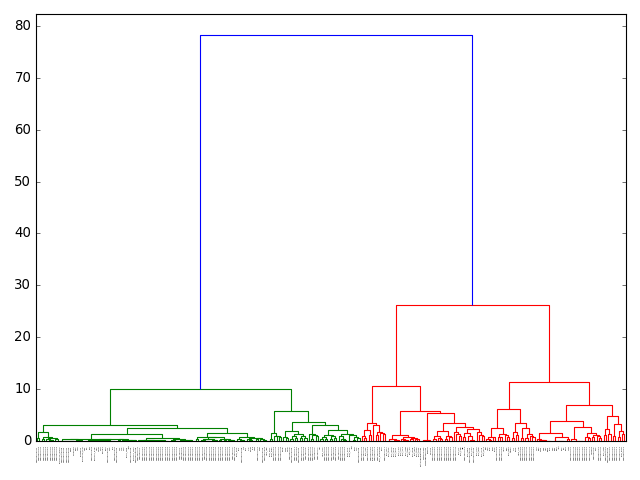

In [22]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist)

# match dendrogram to that returned by R's hclust()
dendrogram(linkage_matrix, orientation="top", labels=names, leaf_font_size='2')


plt.tight_layout()  # fixes margins

# plt.show()